<a href="https://colab.research.google.com/github/Murari2124/Crack-detection-using-Convolution-Neural-Network/blob/main/stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn import linear_model

from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential


In [26]:
# Replace 'input_file.xlsx' with the name of your Excel file
df = pd.read_excel('/content/drive/MyDrive/images/1729258-1613615-Stock_Price_data_set_(1).xlsx')


In [27]:
df.to_csv('output_file.csv', index=False)

In [28]:
# loading dataset
data = pd.read_csv('output_file.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [29]:
data.tail(20)

,Date,Open,High,Low,Close,Adj Close,Volume
989,2022-01-07,549.460022,553.429993,538.219971,541.059998,541.059998,3381700
990,2022-01-10,538.489990,543.690002,526.320007,539.849976,539.849976,4486100
991,2022-01-11,536.989990,543.909973,530.070007,540.840027,540.840027,3077800
992,2022-01-12,544.270020,544.270020,532.020020,537.219971,537.219971,3787400
993,2022-01-13,537.059998,540.789978,518.260010,519.200012,519.200012,4475100
994,2022-01-14,517.599976,538.369995,511.880005,525.690002,525.690002,7849400
995,2022-01-18,520.080017,521.750000,508.679993,510.799988,510.799988,4839100
996,2022-01-19,515.000000,523.210022,510.510010,515.859985,515.859985,4353500
997,2022-01-20,517.750000,526.640015,506.929993,508.250000,508.250000,12659000
998,2022-01-21,400.429993,409.149994,379.989990,397.500000,397.500000,58904300


In [30]:
data.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1004,False,False,False,False,False,False,False
1005,False,False,False,False,False,False,False
1006,False,False,False,False,False,False,False
1007,False,False,False,False,False,False,False


In [31]:
data.shape

(1009, 7)

In [32]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [33]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<Axes: >

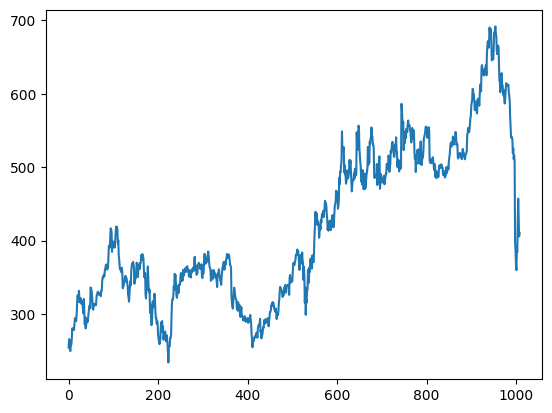

In [34]:
data['Adj Close'].plot()

In [35]:
output_var = pd.DataFrame(data['Adj Close'])


In [36]:
features = ['Open', 'High', 'Low', 'Volume']

In [37]:
scaler = MinMaxScaler()
feature_tf = scaler.fit_transform(data[features])
feature_tf = pd.DataFrame(columns = features, data = feature_tf, index = data.index)
feature_tf.head()

,Open,High,Low,Volume
0,0.061253,0.038304,0.041331,0.186150
1,0.030059,0.035640,0.030273,0.198264
2,0.071243,0.048408,0.072770,0.135690
3,0.072334,0.037683,0.041265,0.141320
4,0.043474,0.011436,0.010729,0.272902


In [38]:
timesplit = TimeSeriesSplit(n_splits=15)
for train_index, test_index in timesplit.split(feature_tf):
        X_train, X_test = feature_tf[:len(train_index)], feature_tf[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [39]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [40]:
X_train.shape

(946, 1, 4)

In [41]:
X_test.shape

(63, 1, 4)

In [42]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_absolute_error', optimizer='adam')

In [43]:
model = lstm.fit(X_train, y_train, epochs = 150, batch_size = 8, verbose = 1)

Epoch 1/150
119/119 [==============================] - 3s 2ms/step - loss: 408.4407
Epoch 2/150
119/119 [==============================] - 0s 1ms/step - loss: 407.1826
Epoch 3/150
119/119 [==============================] - 0s 2ms/step - loss: 403.8944
Epoch 4/150
119/119 [==============================] - 0s 1ms/step - loss: 397.9379
Epoch 5/150
119/119 [==============================] - 0s 2ms/step - loss: 389.4120
Epoch 6/150
119/119 [==============================] - 0s 1ms/step - loss: 378.6548
Epoch 7/150
119/119 [==============================] - 0s 1ms/step - loss: 365.9102
Epoch 8/150
119/119 [==============================] - 0s 1ms/step - loss: 351.5045
Epoch 9/150
119/119 [==============================] - 0s 2ms/step - loss: 335.5583
Epoch 10/150
119/119 [==============================] - 0s 2ms/step - loss: 318.2148
Epoch 11/150
119/119 [==============================] - 0s 1ms/step - loss: 299.5607
Epoch 12/150
119/119 [==============================] - 0s 2ms/step - loss

In [44]:
#LSTM Prediction
y_pred = lstm.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [45]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
MAE = metrics.mean_absolute_error(y_test, y_pred)

In [46]:
r2,MAE

(0.9921162677198223, 6.0859582704613135)

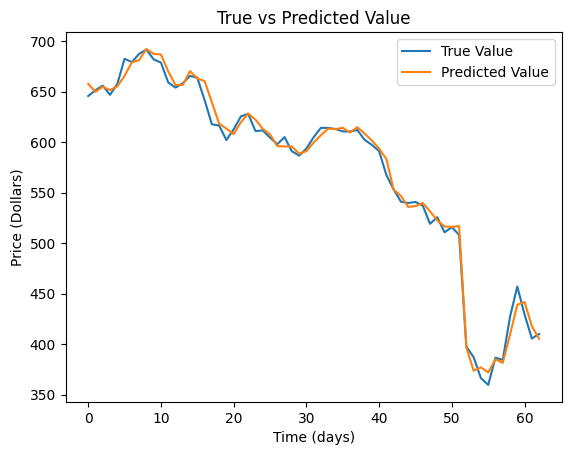

In [47]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='Predicted Value')
plt.title("True vs Predicted Value")
plt.xlabel('Time (days)')
plt.ylabel('Price (Dollars)')
plt.legend()
plt.show()